# Definitions
- Definir estações
- Artigo para ler: https://latamt.ieeer9.org/index.php/transactions/article/view/5563
- Plotar hora a hora, e o describe
- Transformação logaritmica, para variacia não constante?
- Método Box-Cox ou deflacionar a série
- Modelar a serie temporal
  - Normality hypothesis tests, Anderson-Darling and Shapiro-Wilk
  - Decompor em 3 partes: tendência, sazonalidade e resíduo
- Aplicar estacionariedade
- Verificar precipitação, quando tiver.
- A press atmo do nivel da estacao ja é a media
- Usar temp. Bulbo seco
- Agrupar por estacoes do ano (verao, inverno, etc)
- Corte as 5h as 21h
- Verificar umidade no litoral
- Pegar estacoes proximas, ir do litoral ao interior
- Pegar principalmente duas regioes (bahia e sul, por exemplo)
- Transfer learning entre estacoes nas regioes


### Escolhendo estações
Iremos escolher duas regiões:
- Bahia, pegando algumas estações (umas 3) e indo do litoral até o interior.
- RS, com o mesmo comportamento da primeira.

Bahia:
- A401
- A413
- A440

RS:
- A801
- A840
- A893

Nesse Notebook, analisaremos os dados da estação A413 (Feira de Santana, Bahia), que fica ente as areas mais centrais e o litoral.


### Imports

In [6]:
%run Utils.ipynb

In [7]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
%matplotlib inline
from matplotlib import pyplot as plt

In [8]:
dict_files = get_files(n=None)

In [9]:
# dict_files.keys()
print(dict_files["A413"][0])

REGIAO:;NE
UF:;BA
ESTACAO:;FEIRA DE SANTANA
CODIGO (WMO):;A413
LATITUDE:;-12,1961111
LONGITUDE:;-38,96749999
ALTITUDE:;229,64
DATA DE FUNDACAO:;26/05/07



In [10]:
dict_files["A413"][1]

'data/estacoes_solares/2023/INMET_NE_BA_A413_FEIRA DE SANTANA_01-01-2023_A_31-12-2023.CSV'

### Pre processamento

In [11]:
df = load(dict_files["A413"][1])
df = renameDatasetColumns(df)
df = transform_datetime(df)
df = create_datetime_feature(df)
df = create_split_date_features(df)
df = removeNulls(df, "radiacao")
df = change_types(df)

In [12]:
df.head().T

,2271,2272,2273,2274,2275
precipitação_total_horário_mm,0.0,0.0,0.0,0.0,0.0
pressao_atmosferica_ao_nivel_da_estacao_horaria_mb,985.5,984.6,983.6,983.3,983.5
pressão_atmosferica_max_na_hora_ant_aut_mb,NaN,985.6,984.6,983.6,983.5
pressão_atmosferica_min_na_hora_ant_aut_mb,NaN,984.6,983.6,983.3,983.1
radiacao,1304.6,2611.8,2410.2,1795.3,1279.3
temperatura_do_ar_bulbo_seco_horaria_c,29.6,30.3,31.2,28.7,28.4
temperatura_do_ponto_de_orvalho_c,21.2,20.5,19.9,20.3,20.4
temperatura_máxima_na_hora_ant_aut_c,NaN,30.5,31.3,31.4,29.3
temperatura_mínima_na_hora_ant_aut_c,NaN,29.2,30.0,28.7,28.4
temperatura_orvalho_max_na_hora_ant_aut_c,NaN,21.3,21.1,21.1,21.4


### Algumas estatisticas

In [13]:
numerics = ['float16', 'float32', 'float64']

df.select_dtypes(include=numerics).describe().T

,count,mean,std,min,25%,50%,75%,max
precipitação_total_horário_mm,3451.0,0.064387,0.506415,0.0,0.0,0.0,0.0,16.6
pressao_atmosferica_ao_nivel_da_estacao_horaria_mb,3451.0,988.916575,3.161437,978.6,986.7,989.0,991.2,997.5
pressão_atmosferica_max_na_hora_ant_aut_mb,3450.0,989.255014,3.111947,978.7,987.2,989.4,991.5,997.6
pressão_atmosferica_min_na_hora_ant_aut_mb,3450.0,988.669217,3.146861,978.5,986.5,988.7,991.0,997.3
radiacao,3451.0,1357.158534,1004.436275,0.0,467.8,1274.1,2119.2,4107.5
temperatura_do_ar_bulbo_seco_horaria_c,3451.0,26.814518,3.753444,17.5,23.9,26.5,29.5,38.2
temperatura_do_ponto_de_orvalho_c,2858.0,21.027607,2.902771,12.2,19.1,21.3,23.0,29.6
temperatura_máxima_na_hora_ant_aut_c,3450.0,27.504522,3.977398,17.8,24.4,27.3,30.5,38.4
temperatura_mínima_na_hora_ant_aut_c,3450.0,25.866609,3.719566,15.6,23.0,25.5,28.5,36.6
temperatura_orvalho_max_na_hora_ant_aut_c,2795.0,21.914490,2.907153,12.4,20.0,22.2,23.9,30.2


### Plot por mes

<Axes: xlabel='mes', ylabel='mean'>

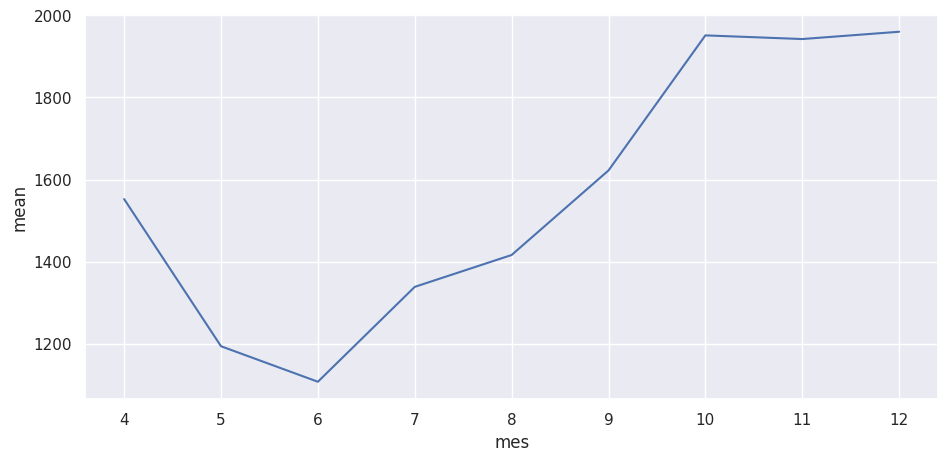

In [14]:
set_plot_size(11, 5)
df_month = filter_between(df, "hora", 10, 20)

df_month = df_month[["mes", "radiacao"]].groupby(['mes'])\
['radiacao'].agg(['mean','std']).reset_index()

sns.lineplot(data=df_month, x=df_month["mes"], y=df_month["mean"])

### Por hora

<Axes: xlabel='hora', ylabel='radiacao'>

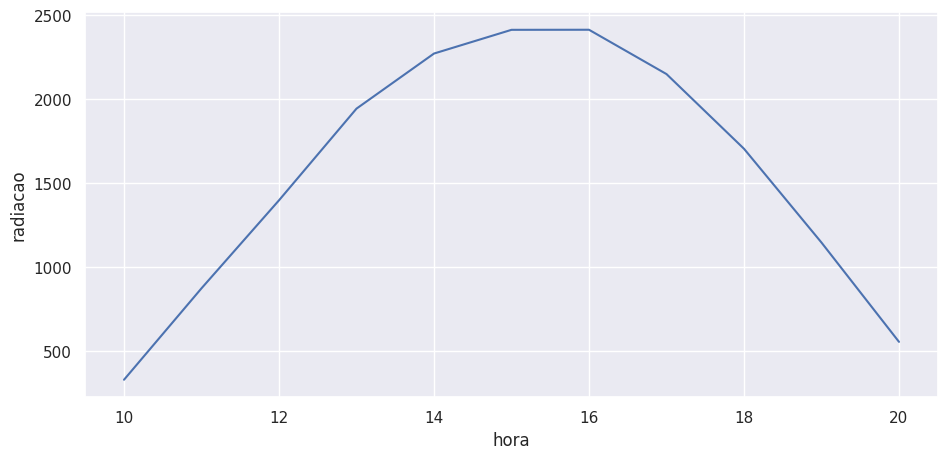

In [15]:
df_hour = filter_between(df, "hora", 10, 20)

df_hour = df_hour[["hora", "radiacao"]].groupby(['hora']).mean().reset_index()

sns.lineplot(data=df_hour, x=df_hour["hora"], y=df_hour["radiacao"])

#### Hora com o vento como `hue`

[ 0.   5.3  6.7  8.1 17. ]


<Axes: xlabel='hora', ylabel='radiacao'>

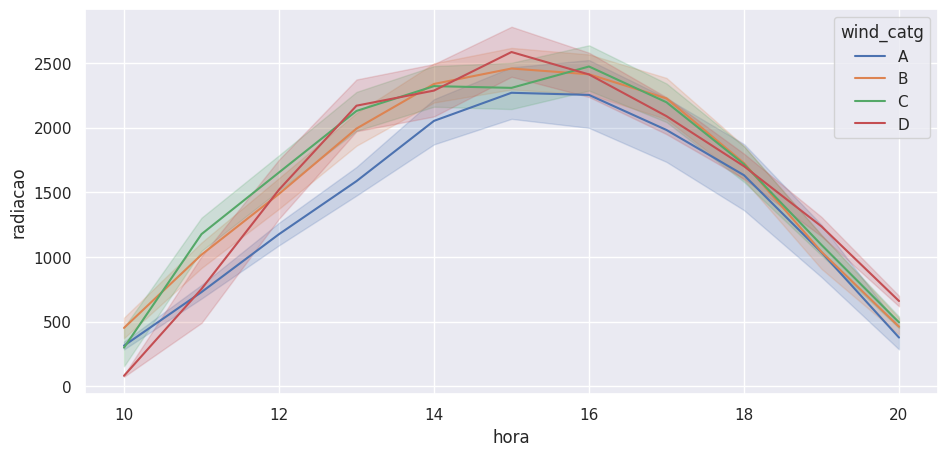

In [16]:
df_hour_wind = filter_between(df, "hora", 10, 20)
df_hour_wind = df_hour_wind[[
    "hora", 
    "radiacao", 
    "vento_rajada_maxima_ms"]]\
.fillna(0)

df_hour_wind["wind_catg"] = create_category("vento_rajada_maxima_ms", df_hour_wind)
sns.lineplot(data=df_hour_wind, x=df_hour_wind["hora"], y=df_hour_wind["radiacao"], hue=df_hour_wind["wind_catg"])

#### Hora com a pressão atmo. como `hue`

[978.6  986.9  989.2  991.35 997.5 ]


<Axes: xlabel='hora', ylabel='radiacao'>

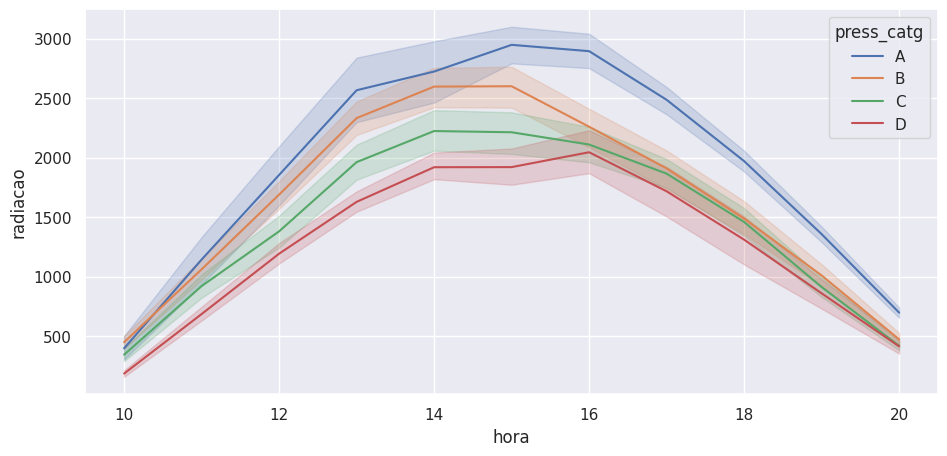

In [17]:
df_hour_press = filter_between(df, "hora", 10, 20)
df_hour_press = df_hour_press[[
    "hora", 
    "radiacao", 
    "pressao_atmosferica_ao_nivel_da_estacao_horaria_mb"]]\
.fillna(0)

df_hour_press["press_catg"] = create_category("pressao_atmosferica_ao_nivel_da_estacao_horaria_mb", df_hour_press)
sns.lineplot(data=df_hour_press, x=df_hour_press["hora"], y=df_hour_press["radiacao"], hue=df_hour_press["press_catg"])

#### Hora com a temperatura como `hue`

[17.8  24.35 26.9  29.95 38.2 ]


<Axes: xlabel='hora', ylabel='radiacao'>

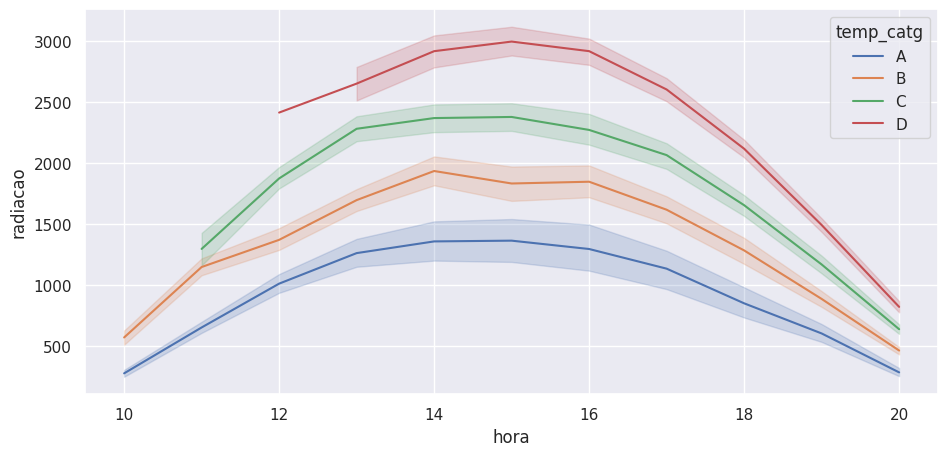

In [18]:
df_temp = filter_between(df, "hora", 10, 20)

df_temp = df_temp[[
    "hora", 
    "radiacao", 
    "temperatura_do_ar_bulbo_seco_horaria_c"]]\
.fillna(0)

df_temp["temp_catg"] = create_category("temperatura_do_ar_bulbo_seco_horaria_c", df_temp)
sns.lineplot(data=df_temp, x=df_temp["hora"], y=df_temp["radiacao"], hue=df_temp["temp_catg"])

#### Hora com a umidade como `hue`

[  0.  41.  67.  83. 100.]


<Axes: xlabel='hora', ylabel='radiacao'>

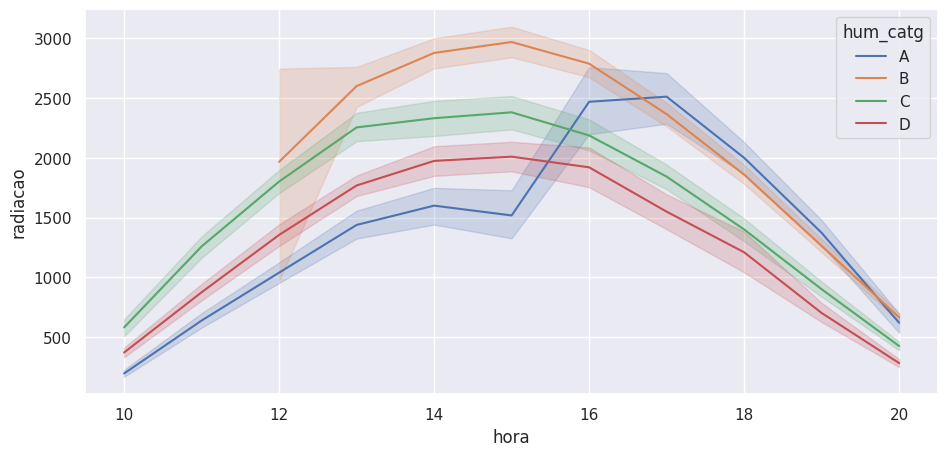

In [19]:
df_hum = filter_between(df, "hora", 10, 20)

df_hum = df_hum[[
    "hora", 
    "radiacao", 
    "umidade_relativa_do_ar_horaria_perc"]]\
.fillna(0)

df_hum["hum_catg"] = create_category("umidade_relativa_do_ar_horaria_perc", df_hum)
sns.lineplot(data=df_hum, x=df_hum["hora"], y=df_hum["radiacao"], hue=df_hum["hum_catg"])

#### Relação linear entre radiação e vento 

<Axes: xlabel='vento_velocidade_horaria_ms', ylabel='radiacao'>

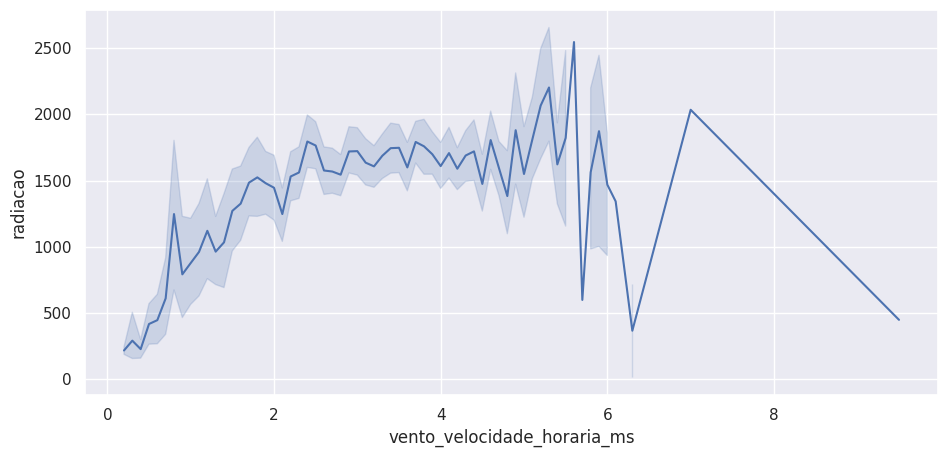

In [20]:
df_rel_wind = filter_between(df, "hora", 10, 20)
sns.lineplot(data=df_rel_wind, x=df_rel_wind["vento_velocidade_horaria_ms"], y=df_rel_wind["radiacao"])

#### Relação linear entre radiação e a umidade 

<Axes: xlabel='umidade_relativa_do_ar_horaria_perc', ylabel='radiacao'>

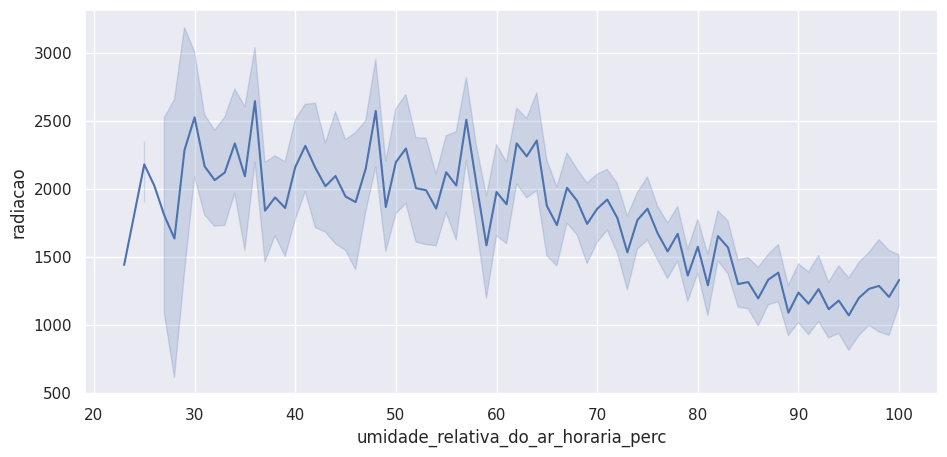

In [21]:
df_rel_hum = filter_between(df, "hora", 10, 20)
sns.lineplot(data=df_rel_hum, x=df_rel_hum["umidade_relativa_do_ar_horaria_perc"], y=df_rel_hum["radiacao"])

### Serie temporal ao longo do ano

<Axes: xlabel='data', ylabel='radiacao'>

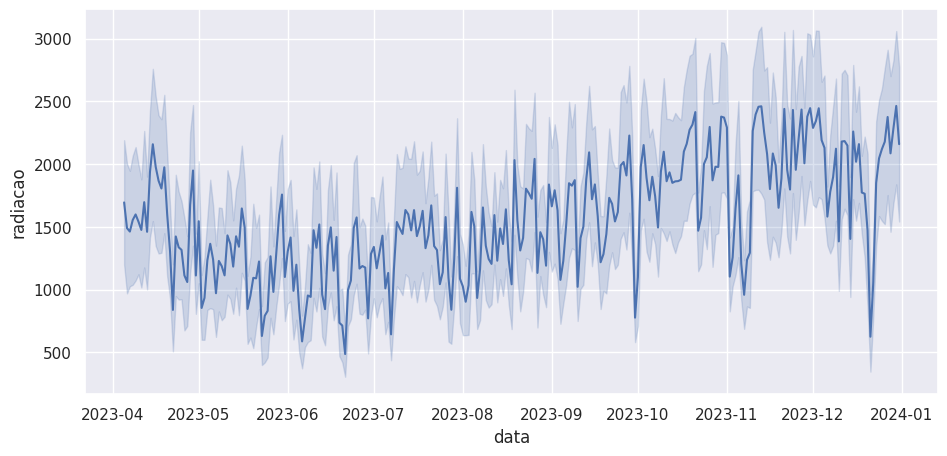

In [22]:
df_test = filter_between(df, "hora", 10, 20)
sns.lineplot(data=df_test, x="data", y="radiacao")

### Em uma semana

<Axes: xlabel='data_hora', ylabel='radiacao'>

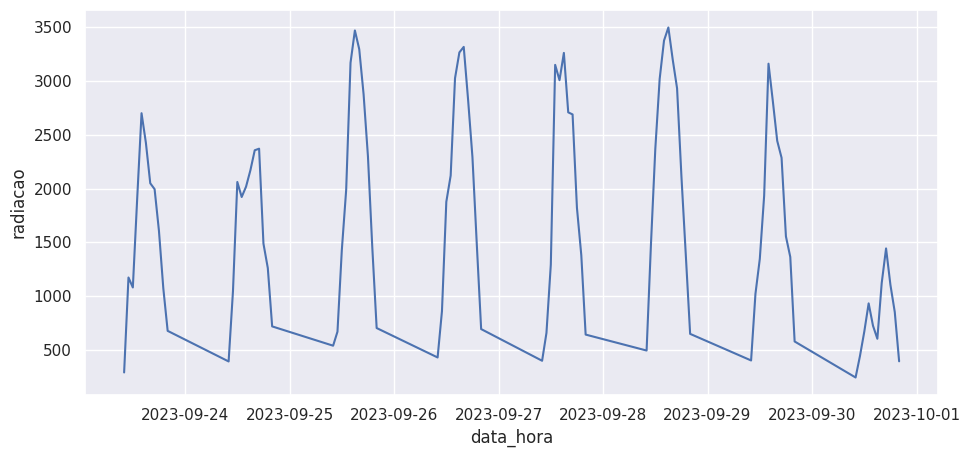

In [41]:
df_test = filter_between(df, "hora", 10, 20)
df_test = filter_between(df_test, "data", "2023-09-23", "2023-09-30")
df_test["rad_mean"] = df_test["radiacao"].mean()
sns.lineplot(data=df_test, x="data_hora", y="radiacao")

### Verão

<Axes: xlabel='data', ylabel='radiacao'>

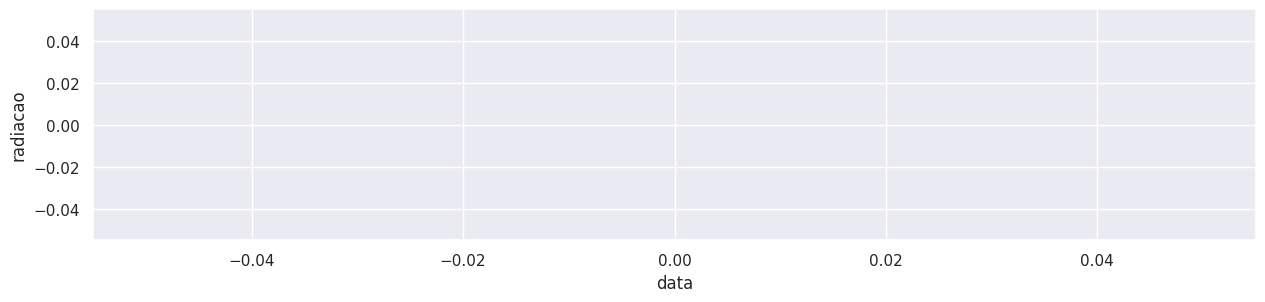

In [24]:
set_plot_size(15, 3)
df_summer = filter_between(df, "data", "2023-01-01", "2023-03-21")
df_summer = filter_between(df_summer, "hora", 10, 17)

sns.lineplot(data=df_summer, x="data", y="radiacao")

### Outono

<Axes: xlabel='data', ylabel='radiacao'>

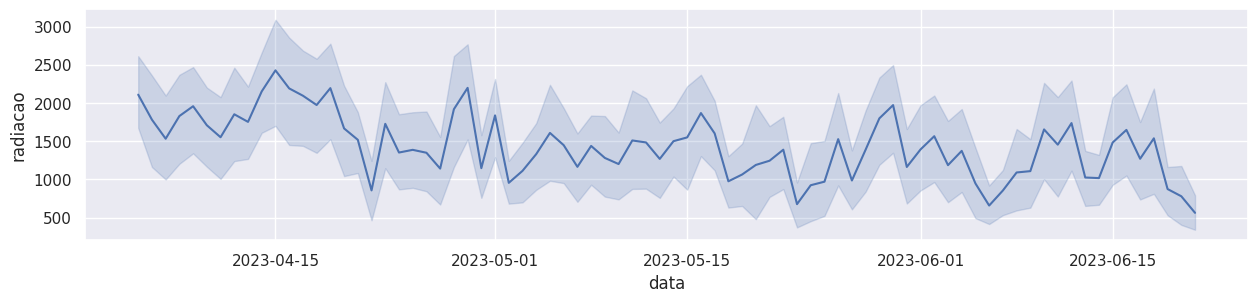

In [25]:
set_plot_size(15, 3)
df_test = filter_between(df, "data", "2023-03-21", "2023-06-21")
df_test = filter_between(df_test, "hora", 10, 17)

sns.lineplot(data=df_test, x="data", y="radiacao")

### Inverno

<Axes: xlabel='data', ylabel='radiacao'>

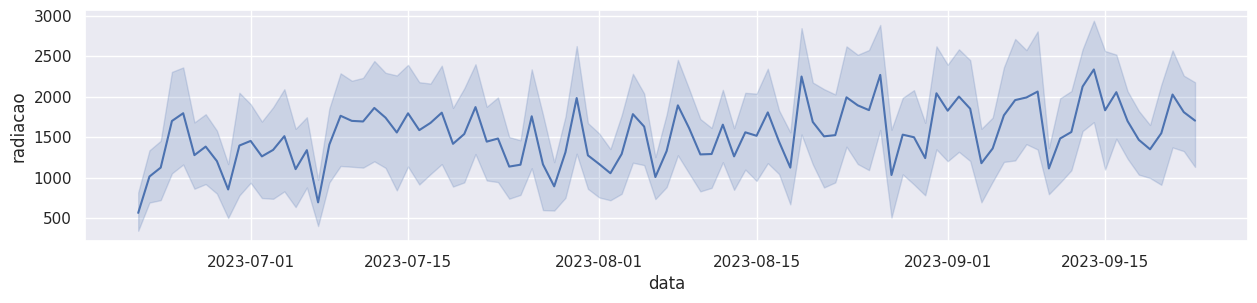

In [26]:
set_plot_size(15, 3)
df_test = filter_between(df, "data", "2023-06-21", "2023-09-23")
df_test = filter_between(df_test, "hora", 10, 17)

sns.lineplot(data=df_test, x="data", y="radiacao")

### Primavera

<Axes: xlabel='data', ylabel='radiacao'>

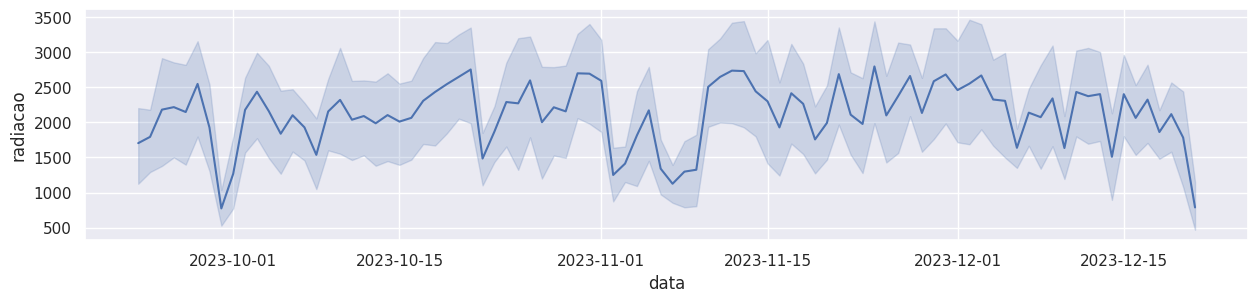

In [27]:
set_plot_size(15, 3)
df_test = filter_between(df, "data", "2023-09-23", "2023-12-21")
df_test = filter_between(df_test, "hora", 10, 17)

sns.lineplot(data=df_test, x="data", y="radiacao")

### Media movel

<Axes: xlabel='data', ylabel='media_movel'>

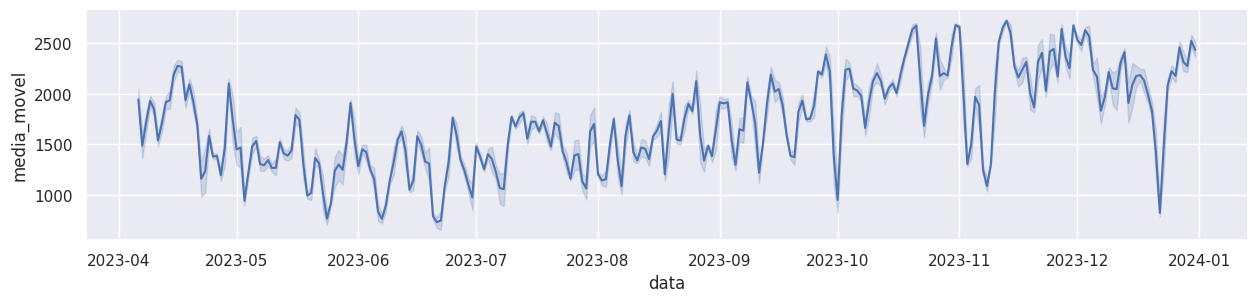

In [28]:
df_test = filter_between(df, "hora", 10, 17)
df_test["media_movel"] = df_test.radiacao.rolling(8).mean()
sns.lineplot(data=df_test, x="data", y="media_movel")

### Aumento e aceleração

<Axes: xlabel='data', ylabel='aumento'>

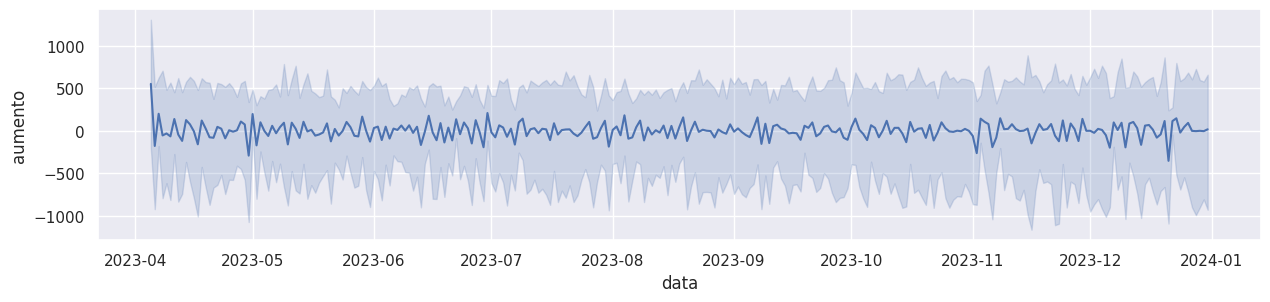

In [29]:
df_test = filter_between(df, "hora", 10, 17)
df_test['aumento'] = df_test.radiacao.diff()
sns.lineplot(data=df_test, x="data", y="aumento")

<Axes: xlabel='data', ylabel='aceleracao'>

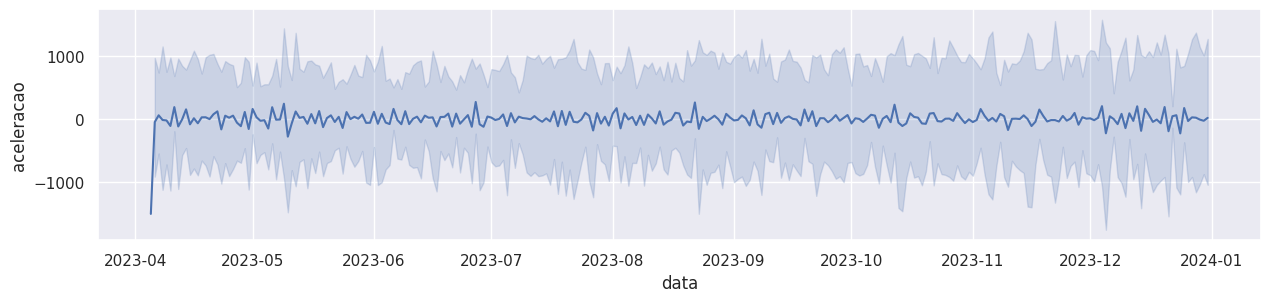

In [30]:
df_test['aceleracao'] = df_test.aumento.diff()
sns.lineplot(data=df_test, x="data", y="aceleracao")

### Autocorrelação

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/misc.py:455: RuntimeWarning: invalid value encountered in double_scalars
  c0 = np.sum((data - mean) ** 2) / n
/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/misc.py:464: RuntimeWarning: divide by zero encountered in double_scalars
  ax.axhline(y=z99 / np.sqrt(n), linestyle="--", color="grey")
/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/misc.py:465: RuntimeWarning: divide by zero encountered in double_scalars
  ax.axhline(y=z95 / np.sqrt(n), color="grey")
/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/misc.py:467: RuntimeWarning: divide by z

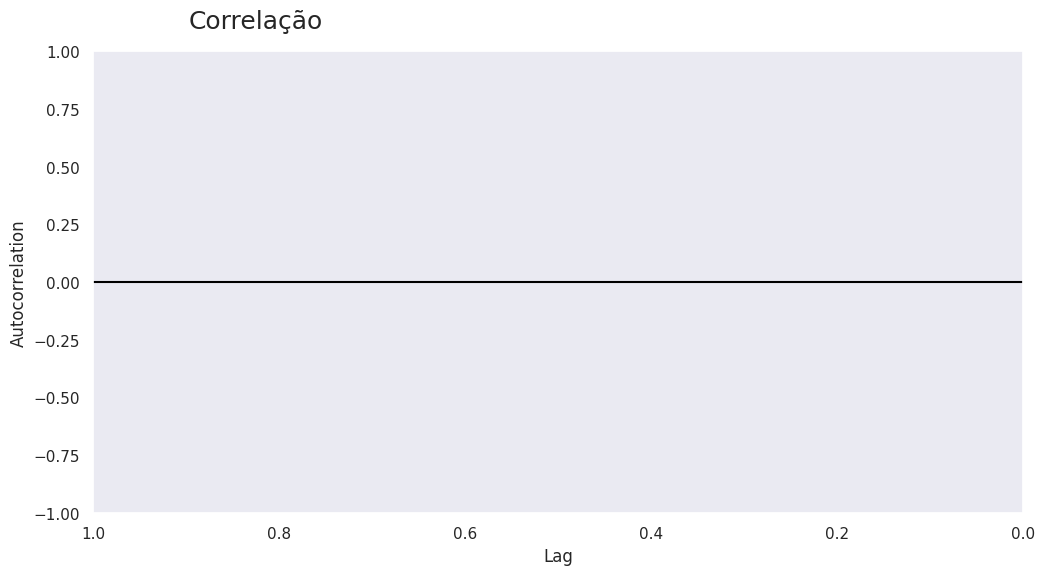

In [31]:
df_test = filter_between(df, "hora", 10, 17)
df_test = filter_between(df_test, "data", "2023-03-21", "2023-03-28")
ax = plt.figure(figsize=(12,6))
ax.suptitle("Correlação", fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(df_test.radiacao)
ax=ax

### Decomposição

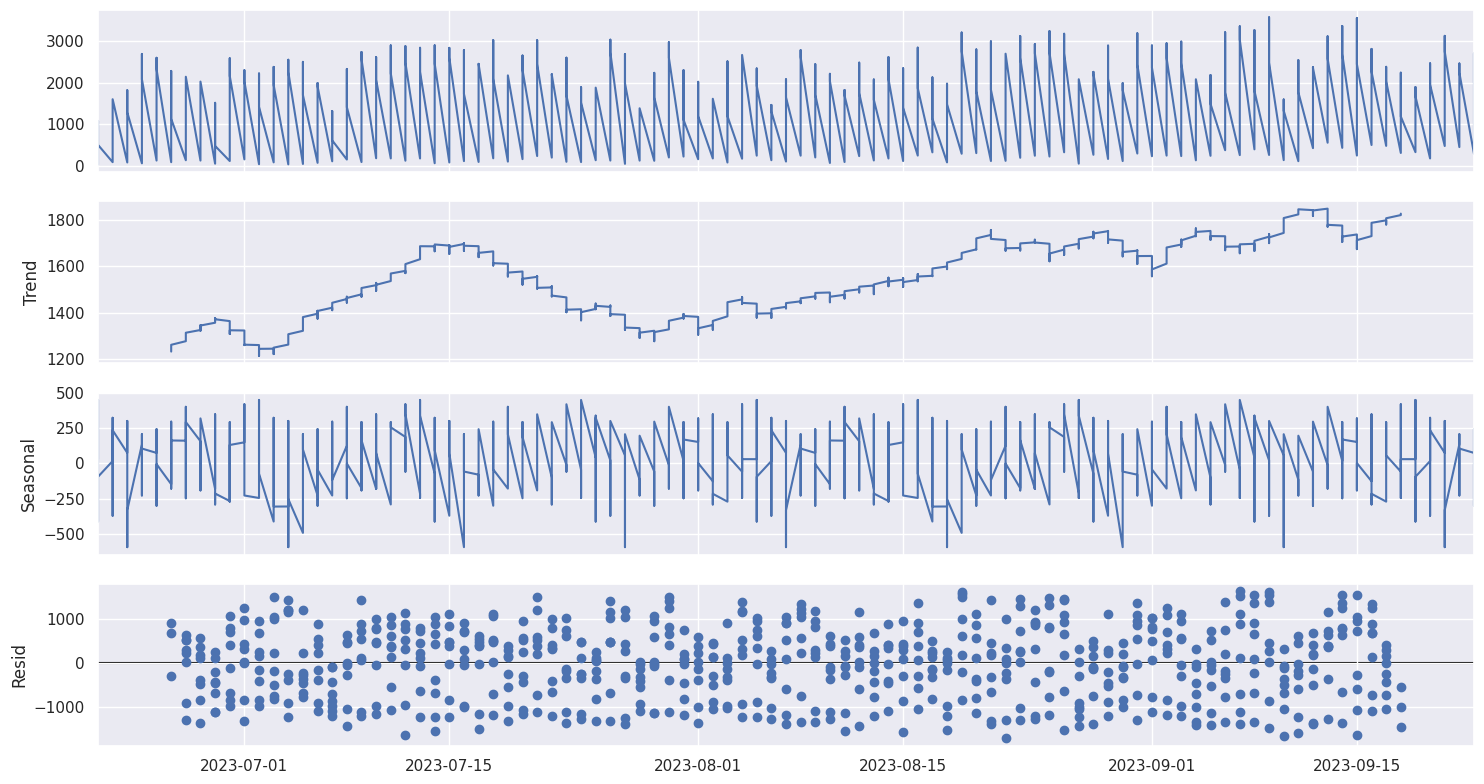

In [35]:
set_plot_size(15, 8)
df_test = filter_between(df, "hora", 10, 17)
df_test = filter_between(df_test, "data", "2023-06-21", "2023-09-23")

resultado = seasonal_decompose(df_test[["radiacao", "data"]].set_index('data'), period=90)
ax = resultado.plot()

### Teste de estacionariedade

In [36]:
result = adfuller(df_test["radiacao"], autolag="AIC")
print('Estatística ADF: {:0.2f}'.format(result[0]))
print('Número de atrasos: {}'.format(result[2]))
print('Valor p: {:0.3f}'.format(result[1]))
for key, value in result[4].items():
    print('Valores críticos:')
    print("{}, {:0.2f}".format(key,value))

Estatística ADF: -6.13
Número de atrasos: 17
Valor p: 0.000
Valores críticos:
1%, -3.44
Valores críticos:
5%, -2.87
Valores críticos:
10%, -2.57


### Box-Cox

In [38]:
# Importar bibliotecas
from scipy.stats import boxcox
# Calcular melhor valor de lambda para a série temporal
df_box_cox = filter_between(df, "data", "2023-06-21", "2023-09-23")
df_box_cox = filter_between(df_box_cox, "hora", 10, 17)
serie_temporal2, lambda_boxcox = boxcox(df_box_cox["radiacao"])

In [39]:
df_box_cox["rad"] = serie_temporal2

<Axes: xlabel='data', ylabel='rad'>

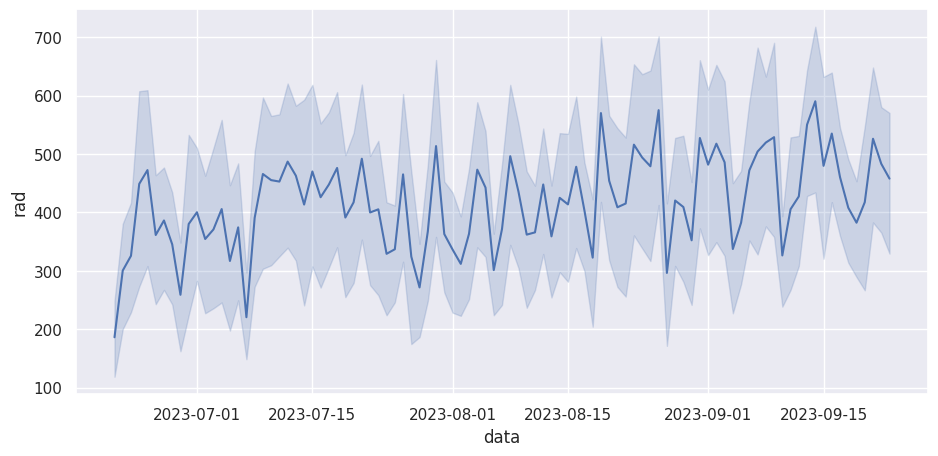

In [40]:
set_plot_size(11, 5)
sns.lineplot(data=df_box_cox, x="data", y="rad")